# 2024. 11. 14 코테 스터디 풀이

## 1. 2292번 풀이
문제에서 알고리즘에 대해 설명해주고 있고, 테스트 케이스의 입력의 범위가 0~12 로 매우 작은 것을 확인할 수 있습니다. 

또한 어차피 문자열 결과를 출력해줘야한다는 점에서 낮은 공간복잡도로 풀 필요가 없다고 생각하여 단순 구현 문제로 접근했습니다. 

문제에서 3등분을 하고 그 결과를 다시 3등분하는 과정이 재귀적 함수로 구현되면 좋을거 같다고 생각하여 구현했습니다.

문제에서 주의해야 하는 점은 다른 문제들과 달리 **파일의 끝에서 입력을 멈춘다.** 라는 점이므로 EOF 를 int로 캐스팅하는 과정에서 발생하는 Exception을 이용하여 반복문을 break 시키는 것이 중요했습니다!

In [ ]:
import sys

def cantor(s:str)->str:
    l = len(s)
    if l == 1:
        return s
    return cantor(s[:l//3]) + ' '*(l//3) + cantor(s[2*l//3:])

while 1:
    try:
        N = int(sys.stdin.readline())
        print(cantor('-'*3**N))
    except : # EOF 발생시
        break # 종료

## 2. 2581번 풀이

본 문제의 핵심은 5개가 든 봉지를 최대한 많이 만드는 것입니다. 

그럼 가장 쉬운 케이스는 5의 배수일 때이고 3개가 든 봉지가 많아질 수록 사용해야하는 봉지 수는 많아질 것입니다. 

그럼 일단 5로 나누어 떨어지는지 확인한 후, 안 나누어 떨어진다면 **최소 하나 이상의 3개짜리 묶음인 경우**이거나 **3,5개의 묶음으로 못 나누는 경우**입니다. 

그럼 3씩 빼가면서 5로 나누어지는지 체크합니다. 중간에 5로 나누어 떨어진다면 그것이 답이고 만약 0보다 작아진다면 그 경우는 답이 없는 경우가 됩니다.

In [ ]:
N = int(input())
number_of_three = 0
while N >= 0:
    if N % 5 == 0:
        print(N//5 + number_of_three)
        break
    number_of_three += 1
    N -= 3
if N < 0: print(-1)

3


## 3. 10989번 풀이
이 문제는 다른 문제들과 달리 낮은 공간 복잡도를 요구하는 문제입니다. 

그래서 단순히 배열에 저장해서 정렬하는 방식은 적합하지 않습니다. 

문제의 입력 조건이 특이한데 주어지는 수의 개수는 매우 크지만 수의 범위는 작은것을 확인할 수 있습니다. 

따라서 이 문제를 해결하기 위해서는 계수 정렬을 이용하면 해결이 가능합니다. 즉 숫자별로 출력할 개수를 세고 반복해서 출력하는 것이 핵심입니다.

### 계수 정렬로 푸는 방법

In [ ]:
import sys
count_list = [0]*10001
for _ in range(int(sys.stdin.readline())): count_list[int(sys.stdin.readline())] += 1
for i in range(10001): 
    if count_list[i] != 0:
        for _ in range(count_list[i]):
            print(i)

### Dictionary 자료구조 이용방법

In [ ]:
import sys
from collections import defaultdict
count_dict = defaultdict(int)
for _ in range(int(sys.stdin.readline())): count_dict[int(sys.stdin.readline())] += 1
count_list = list(sorted(count_dict.items()))
for i, count in enumerate(count_list): 
    for _ in range(count):
            print(i)

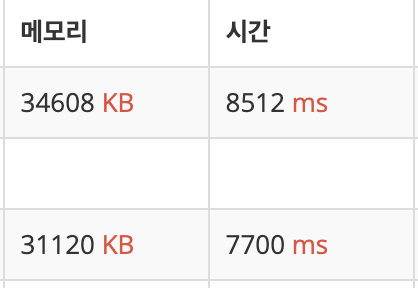

계수정렬로 푸는 방식이 더 좋은 것을 알 수 있었다...ㅠ

In [ ]:
import sys
count_list = [0]*10001
for _ in range(int(sys.stdin.readline())): count_list[int(sys.stdin.readline())] += 1
for i in range(10001): 
    if count_list[i] != 0:
        print(f'{i}\n'*count_list[i],end='') # 최대 60MB 크기 차지할 수 있음

파이썬에서는 문자열 반복이 가능해서 반복문 없이 문자열 반복해서 생성해낼 수 있는데 이 부분이 저를 삽질하게 만들었습니다. 

이유를 생각해 봤는데 만약에 N개가 모두 10000이면 문자열 10000\n이 N개만큼 생기므로 Latin-1 문자 6개는 49 + 6 55 바이트를 차지한다. 

6N 길이의 문자열은 49 + 6N 바이트를 차지하게 되고 최대 N을 대입해보면 60000049 바이트이므로 약 60 MB 차지하므로 문제 제약사항 8MB 를 초과합니다. 따라서 문자 하나하나 출력하는 것도 주의해야할 점이 었습니다.

In [26]:
print(sys.getsizeof(''))
print(sys.getsizeof('0'))
print(sys.getsizeof('\n'))
print(sys.getsizeof('ㅁ'))
print(sys.getsizeof('10000\n'*4))

49
50
50
76
73
